In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variational Inference

Inference and learning often involve intractable integrals. 

Prime examples include __bayesian inference__

$$p(y | \mathbf{x}, \mathcal{D})=\int p(y, \mathbf{w} | \mathbf{x}, \mathcal{D}) \mathrm{d} \mathbf{w}=\int p(y | \mathbf{x}, \mathbf{w}) p(\mathbf{w} | \mathcal{D}) \mathrm{d} \mathbf{w}$$


or marginalization of unseen variables

$$L(\boldsymbol{\theta})=p(\mathcal{D} ; \boldsymbol{\theta})=\int_{\mathbf{u}} p(\mathbf{u}, \mathcal{D} ; \boldsymbol{\theta}) \mathrm{d} \mathbf{u}$$


There are two possible methods to approximate such integrals:
- Monte Carlo estimate through sampling
- Variational approach

In this notebook I will focus on this second approach.

## Kullback-Leibler divergence

The KL divergence is a fundamental concept in variational inference and consequently for variational autoencoders.
The KL divergence between two distributions $p$ and $q$ is:

$$\mathrm{KL}(p \| q)=\int p(\mathbf{x}) \,\log \left(\frac{p(\mathbf{x})}{q(\mathbf{x})}  \right)\mathrm{d} \mathbf{x}=\mathbb{E}_{p(\mathbf{x})}\left[\log \frac{p(\mathbf{x})}{q(\mathbf{x})}\right]$$

Properties of KL divergence:
- $\mathrm{KL}(p \| q)=0$ iff $p = q$ 
- $\mathrm{KL}(p \| q)\neq \mathrm{KL}(q \| p)$ (non-commutative)
- $\mathrm{KL}(p \| q)\geq0$ (always non-negative)

## Variational principle

Given a joint distribution $p(\mathbf{x}, \mathbf{y})$, the Variational principle states that we can __formulate inference tasks__ such as marginalization $p(\mathbf{x})=\int p(\mathbf{x}, \mathbf{y}) \mathrm{d} \mathbf{y}$, and conditioning $p(\mathbf{y} | \mathbf{x})$, __as optimization problems__.

Specifically, the maximisation of variational free energy

$$\mathcal{F}(\mathbf{x}, q)=\mathbb{E}_{q(\mathbf{y})}\left[\log \frac{p(\mathbf{x}, \mathbf{y})}{q(\mathbf{y})}\right]$$

leads to 
- $\log p(\mathbf{x})=\max _{q(\mathbf{y})} \mathcal{F}(\mathbf{x}, q)$
- $p(\mathbf{y} | \mathbf{x})=\operatorname{argmax}_{q(\mathbf{y})} \mathcal{F}(\mathbf{x}, q)$


By separating the joint distribution $p$ in the formulation of the free energy, we find that
$$\log p\left(\mathbf{x}\right)=\mathrm{KL}\left(q(\mathbf{y}) \| p\left(\mathbf{y} | \mathbf{x}\right)\right)+\mathcal{F}\left(\mathbf{x}, q\right)=\mathrm{const}$$

Meaning that maximising the variational free energy is equivalent to minimising the KL divergence $\mathrm{KL}(q \| p)$

Since the KL-divergence is always non-negative, $\mathcal{F}$ is also referred to as the Evidence Lower Bound (ELBO), since it provides a lower bound for the marginal likelihood.
$$\log p\left(\mathbf{x}\right)\geq\mathcal{F}\left(\mathbf{x}, q\right)$$

In variational inference the $q$ distribution involved in the ELBO is parametrised as $q(\mathbf{y}; \mathbf{\theta})$, and the parameters are optimised to push the ELBO as high as possible.

## Example implementation: variational inference in 1D

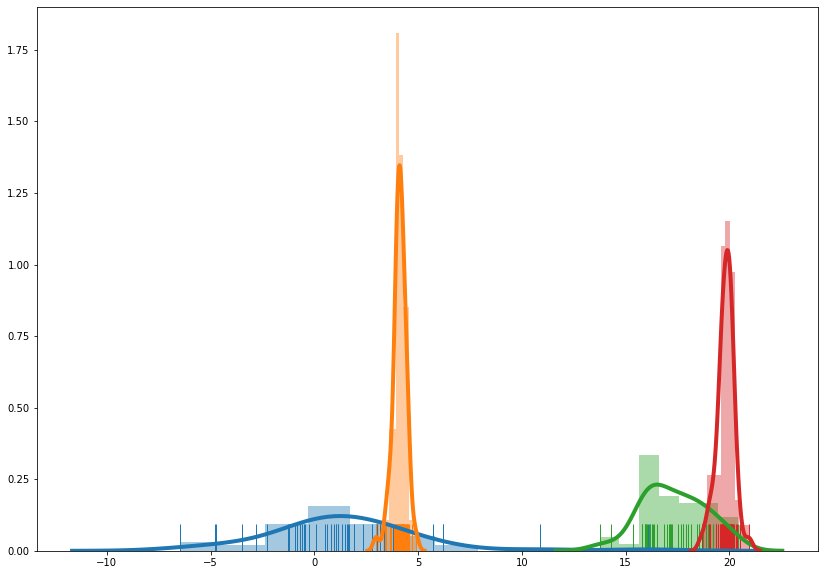

In [2]:
# Generate the data: let us consider a mixture of laplacian distributions
SEED = 2314
N = 200 # number of points
K = 4 # distributions in the mixture
np.random.seed(SEED)
source_distr = np.random.randint(0, K, N)
data = np.zeros(N)

fig, ax = plt.subplots(figsize=(14, 10))
for i in range(K):
    mean = 20* np.random.random()
    scale = 3 * np.random.random()
    
    idxs = np.where(source_distr==i)[0]
    laplacian_data = np.random.laplace(mean, scale, len(idxs))
    data[idxs] = laplacian_data
    sns.distplot(laplacian_data, bins="auto", kde=True, rug=True, kde_kws={"linewidth": 4}, ax=ax)
    

In [3]:
# Fitting a gaussian model
